## IMPORTING LIBRARIES

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import squarify
from plotly.subplots import make_subplots
from plotly.offline import plot

import warnings

pd.options.display.max_rows = 1000 #handy for showing truncated results
pd.options.display.max_columns = 1000 #handy for showing truncated results
warnings.filterwarnings('ignore')

# I - LOADING DATASET

In [2]:
df = pd.read_csv('Speed+Dating+Data.csv', encoding='ISO-8859-1')

pd.set_option('display.max_columns', None) # Afficher tous les colonnes
print(f"Number of rows : {df.shape[0]} - Number of columns : {df.shape[1]}")
df.head()

Number of rows : 8378 - Number of columns : 195


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [3]:
# Showing all columns
print(df.columns.tolist())

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'de

In [4]:
df['dec']

0       1
1       1
2       1
3       1
4       1
       ..
8373    0
8374    0
8375    0
8376    0
8377    0
Name: dec, Length: 8378, dtype: int64

In [5]:
# Statistic desciption
df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
# Number of participants/waves of dating
print(f"{df.iid.nunique()} participants")
print(f"{len(df['wave'].value_counts())} waves")

551 participants
21 waves


# II - DATA CLEANING

In [7]:
# Vérifier les valeurs manquantes dans le dataset
miss_val = df.isnull().sum()
miss_val

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

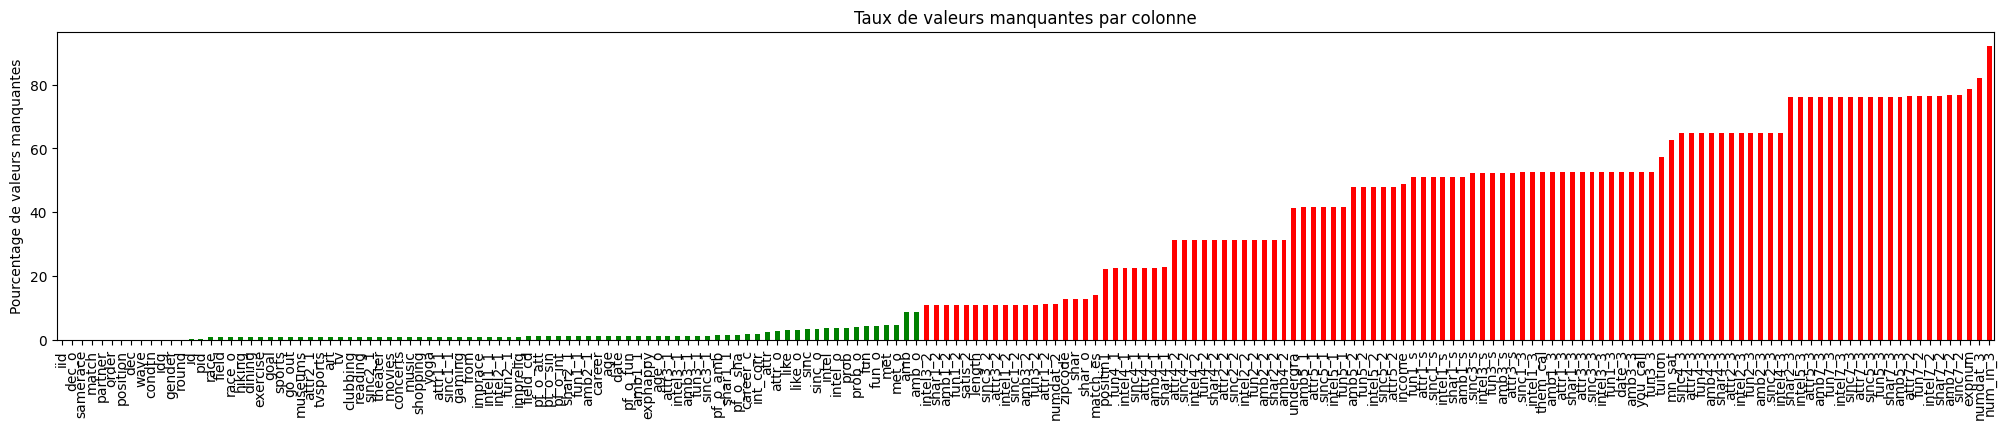

In [8]:
# Showing missing values by columns
nan_percentage = (df.isna().mean() * 100).sort_values()

fig, ax = plt.subplots(figsize=(25, 4))
colors = ['blue' if p == 10 else 'green' if p <= 10 else 'red' for p in nan_percentage]
nan_percentage.plot(kind="bar", color=colors, ax=ax)

# labels
ax.set_title("Taux de valeurs manquantes par colonne")
ax.set_ylabel("Pourcentage de valeurs manquantes")

plt.show()

There is a huge lack of data in the attribute or self-scoring columns, so we are going to concentrate on more precise data such as age, gender, religion, education, etc...

Text(0.5, 1.0, 'Correlation entre les features')

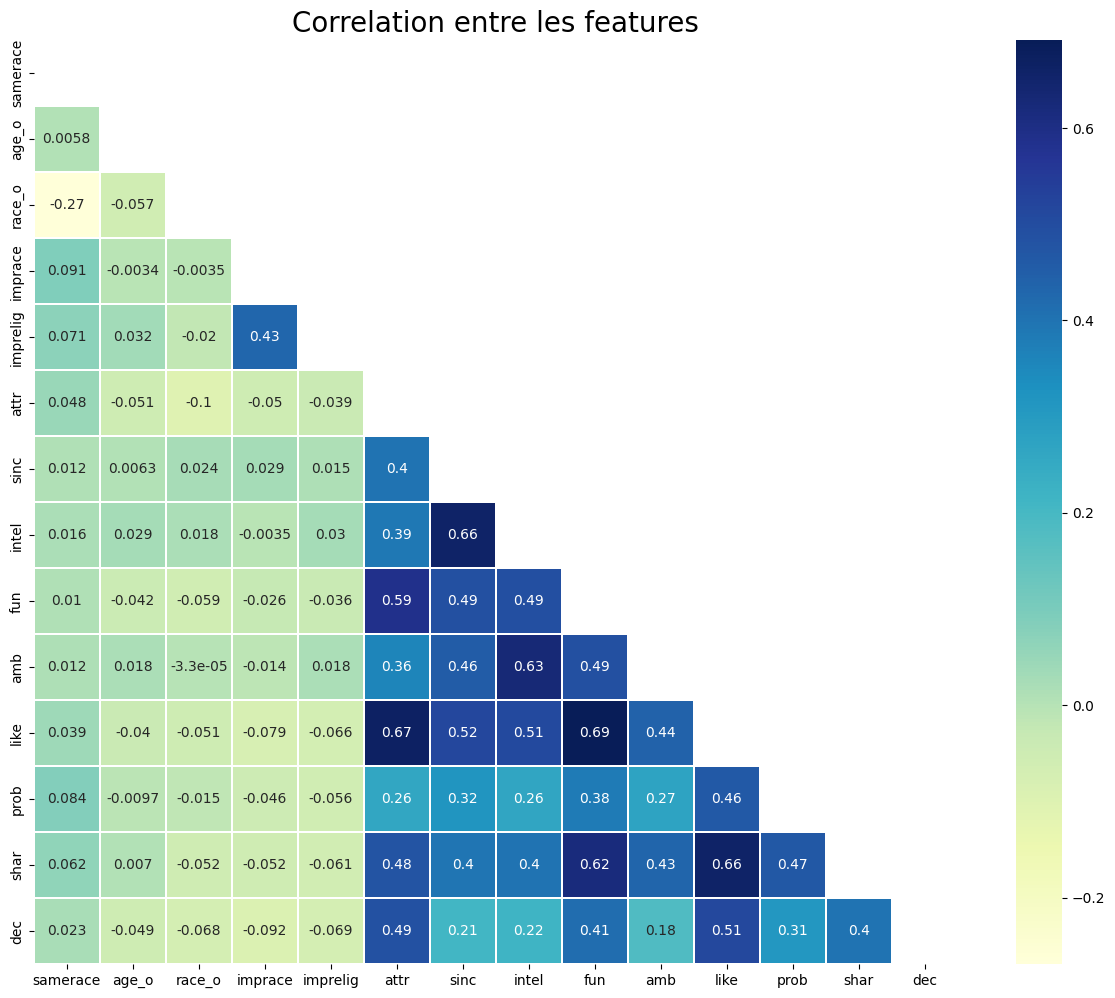

In [9]:
corr_columns = ['samerace', 'age_o', 'race_o', 'imprace', 'imprelig', 'attr', 'sinc', 'intel', 'fun', 'amb', 'like', 'prob', 'shar', 'dec']
data_corr = df[corr_columns]

mask = np.zeros_like(data_corr.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (15,12))
sns.heatmap (data_corr.corr(), annot=True, mask = mask,
             cmap = 'YlGnBu', linewidths=0.1, square=True)
plt.title("Correlation entre les features", fontsize=20)

On constate par cette Headmap que les attributs personnels comme le plaisir, l'attractivité ou autres sont beaucoup corrélés les uns aux autres tant disque les features comme la race, religion le sont beaucoup moins.

Text(0.5, 1.0, 'Age des participants')

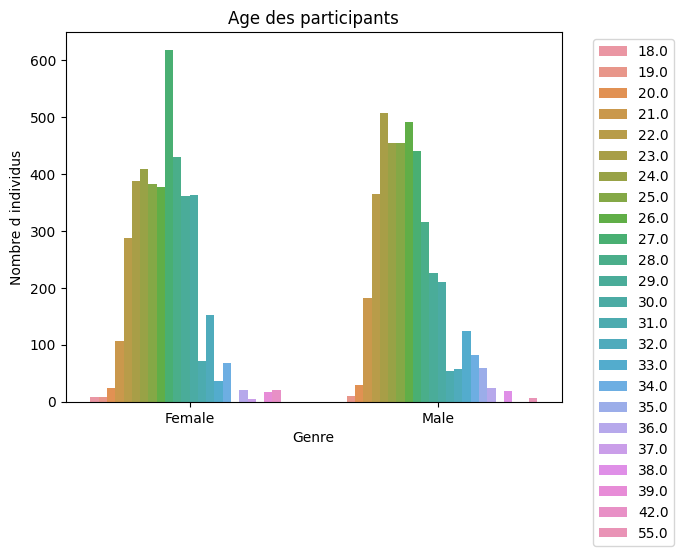

In [10]:
df['gender']=df['gender'].apply(lambda x: "Female" if x==0 else "Male")
sns.countplot(x="gender",hue='age_o',data=df)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel('Genre')
plt.ylabel('Nombre d individus')
plt.title('Age des participants')

In [11]:
# Let's rename few features or features's values

df_clean = df.copy()

df_clean['gender'] = df_clean.gender.map({1 : 'Male', 0 : 'Female'}).fillna(df_clean.gender)
df_clean['race'] = df_clean.race.map({1: 'Black/African American', 2: 'European/Caucasian-American', 3: 'Latino/Hispanic American',  4: 'Asian/Pacific Islander/Asian-American', 5: 'Native American', 6: 'Other'}).fillna(df_clean.race)
df_clean['race_o'] = df_clean.race_o.map({1: 'Black/African American', 2: 'European/Caucasian-American', 3: 'Latino/Hispanic American',  4: 'Asian/Pacific Islander/Asian-American', 5: 'Native American', 6: 'Other'}).fillna(df_clean.race_o)

df_clean['match'] = df_clean.match.map({1 : 'Yes', 0 : 'No'}).fillna(df_clean.match)
df_clean['dec_o'] = df_clean.dec_o.map({1 : 'Yes', 0 : 'No'}).fillna(df_clean.dec_o)
df_clean['dec'] = df_clean.dec.map({1 : 'Yes', 0 : 'No'}).fillna(df_clean.dec)

In [12]:
def rename_columns(df_clean):
    for col in df_clean.columns:
        if "attr" in col.lower():
            df_clean.columns = df_clean.columns.str.replace("attr", "Attractive")
        if "sinc" in col.lower():
            df_clean.columns = df_clean.columns.str.replace("sinc", "Sincere")
        if "intel" in col.lower():
            df_clean.columns = df_clean.columns.str.replace("intel", "Intelligent")
        if "fun" in col.lower():
            df_clean.columns = df_clean.columns.str.replace("fun", "Fun")
        if "amb" in col.lower():
            df_clean.columns = df_clean.columns.str.replace("amb", "Ambitious")
        if "shar" in col.lower():
            df_clean.columns = df_clean.columns.str.replace("shar", "Shared_interests")
    return df_clean.columns

df_clean.columns = rename_columns(df_clean)

In [13]:
df_clean.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_Fun,pf_o_Ambitious,pf_o_sha,dec_o,Attractive_o,Sincere_o,Intelligent_o,Fun_o,Ambitious_o,Shared_interests_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,Attractive1_1,Sincere1_1,Intelligent1_1,Fun1_1,Ambitious1_1,Shared_interests1_1,Attractive4_1,Sincere4_1,Intelligent4_1,Fun4_1,Ambitious4_1,Shared_interests4_1,Attractive2_1,Sincere2_1,Intelligent2_1,Fun2_1,Ambitious2_1,Shared_interests2_1,Attractive3_1,Sincere3_1,Fun3_1,Intelligent3_1,Ambitious3_1,Attractive5_1,Sincere5_1,Intelligent5_1,Fun5_1,Ambitious5_1,dec,Attractive,Sincere,Intelligent,Fun,Ambitious,Shared_interests,like,prob,met,match_es,Attractive1_s,Sincere1_s,Intelligent1_s,Fun1_s,Ambitious1_s,Shared_interests1_s,Attractive3_s,Sincere3_s,Intelligent3_s,Fun3_s,Ambitious3_s,satis_2,length,numdat_2,Attractive7_2,Sincere7_2,Intelligent7_2,Fun7_2,Ambitious7_2,Shared_interests7_2,Attractive1_2,Sincere1_2,Intelligent1_2,Fun1_2,Ambitious1_2,Shared_interests1_2,Attractive4_2,Sincere4_2,Intelligent4_2,Fun4_2,Ambitious4_2,Shared_interests4_2,Attractive2_2,Sincere2_2,Intelligent2_2,Fun2_2,Ambitious2_2,Shared_interests2_2,Attractive3_2,Sincere3_2,Intelligent3_2,Fun3_2,Ambitious3_2,Attractive5_2,Sincere5_2,Intelligent5_2,Fun5_2,Ambitious5_2,you_call,them_cal,date_3,numdat_3,num_in_3,Attractive1_3,Sincere1_3,Intelligent1_3,Fun1_3,Ambitious1_3,Shared_interests1_3,Attractive7_3,Sincere7_3,Intelligent7_3,Fun7_3,Ambitious7_3,Shared_interests7_3,Attractive4_3,Sincere4_3,Intelligent4_3,Fun4_3,Ambitious4_3,Shared_interests4_3,Attractive2_3,Sincere2_3,Intelligent2_3,Fun2_3,Ambitious2_3,Shared_interests2_3,Attractive3_3,Sincere3_3,Intelligent3_3,Fun3_3,Ambitious3_3,Attractive5_3,Sincere5_3,Intelligent5_3,Fun5_3,Ambitious5_3
0,1,1.0,Female,1,1,1,10,7,NaN,4,1,11.0,No,0.14,0,27.0,European/Caucasian-American,35.0,20.0,20.0,20.0,0.0,5.0,No,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,Yes,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,Female,1,1,1,10,7,NaN,3,2,12.0,No,0.54,0,22.0,European/Caucasian-American,60.0,0.0,0.0,40.0,0.0,0.0,No,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,Yes,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,Female,1,1,1,10,7,NaN,10,3,13.0,Yes,0.16,1,22.0,Asian/Pacific Islander/Asian-American,19.0,18.0,19.0,18.0,14.0,12.0,Yes,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.

In [14]:
print(df_clean.columns.tolist())

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_Fun', 'pf_o_Ambitious', 'pf_o_sha', 'dec_o', 'Attractive_o', 'Sincere_o', 'Intelligent_o', 'Fun_o', 'Ambitious_o', 'Shared_interests_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'Attractive1_1', 'Sincere1_1', 'Intelligent1_1', 'Fun1_1', 'Ambitious1_1', 'Shared_interests1_1', 'Attractive4_1', 'Sincere4_1', 'Intelligent4_1', 'Fun4_1', 'Ambitious4_1', 'Shared_interests4_1', 'Attractive2_1', 'Sincere2_1', 'Intelligent2_1', 'Fun2_1', 'Ambitious2_

# III - VISUALIZING AND ANALISYS

# Let's try to find the least interesting attribute for both men and women

In [15]:
# We keep only unique iids
df_clean_unique_iid = df_clean.drop_duplicates(subset='iid', keep='first')

In [16]:
attributs = ['Attractive_o', 'Sincere_o', 'Intelligent_o', 'Fun_o', 'Ambitious_o', 'Shared_interests_o']

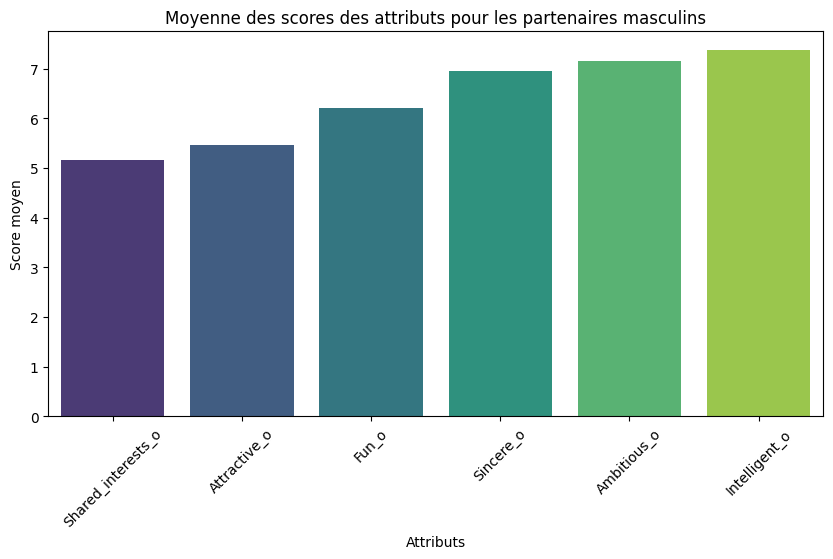

In [17]:
# Filtering to obtain only lines where the partner is a man
df_male = df_clean_unique_iid[df_clean_unique_iid['gender'] == 'Male'] 

# Calculate the average for each attribute
avg_attributes = df_male[attributs].mean()

# Sort in ascending order to put the least desirable attributes first
avg_attributes = avg_attributes.sort_values()

# Display the bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=avg_attributes.index, y=avg_attributes.values, palette="viridis")
plt.title("Moyenne des scores des attributs pour les partenaires masculins")
plt.xlabel("Attributs")
plt.ylabel("Score moyen")
plt.xticks(rotation=45)
plt.show()


Nous constatons que chez les hommes, l'attribut le plus important est l'intelligence et le moins important est les intérêts partagés.

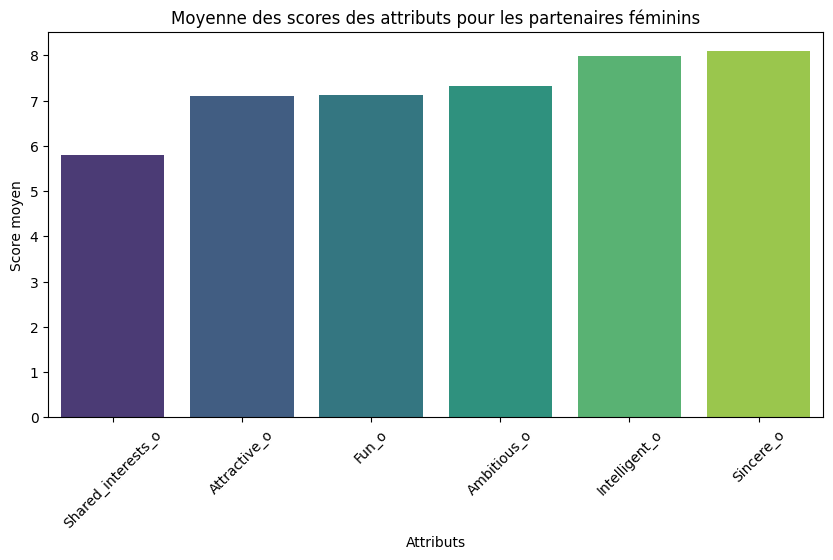

In [18]:
# Filtering to obtain only lines where the partner is a woman
df_female = df_clean_unique_iid[df_clean_unique_iid['gender'] == 'Female'] 


avg_attributes = df_female[attributs].mean()

avg_attributes = avg_attributes.sort_values()

plt.figure(figsize=(10,5))
sns.barplot(x=avg_attributes.index, y=avg_attributes.values, palette="viridis")
plt.title("Moyenne des scores des attributs pour les partenaires féminins")
plt.xlabel("Attributs")
plt.ylabel("Score moyen")
plt.xticks(rotation=45)
plt.show()



Nous constatons que chez les femmes, l'attribut le plus important est la sincèrité et le moins important est les intérêts partagés.

### First conclusion: looking at the two graphs, we can say that for both men and women, the least important attribute is shared interests.

## How important do people think attractiveness is in potential mate selection vs. its real impact?

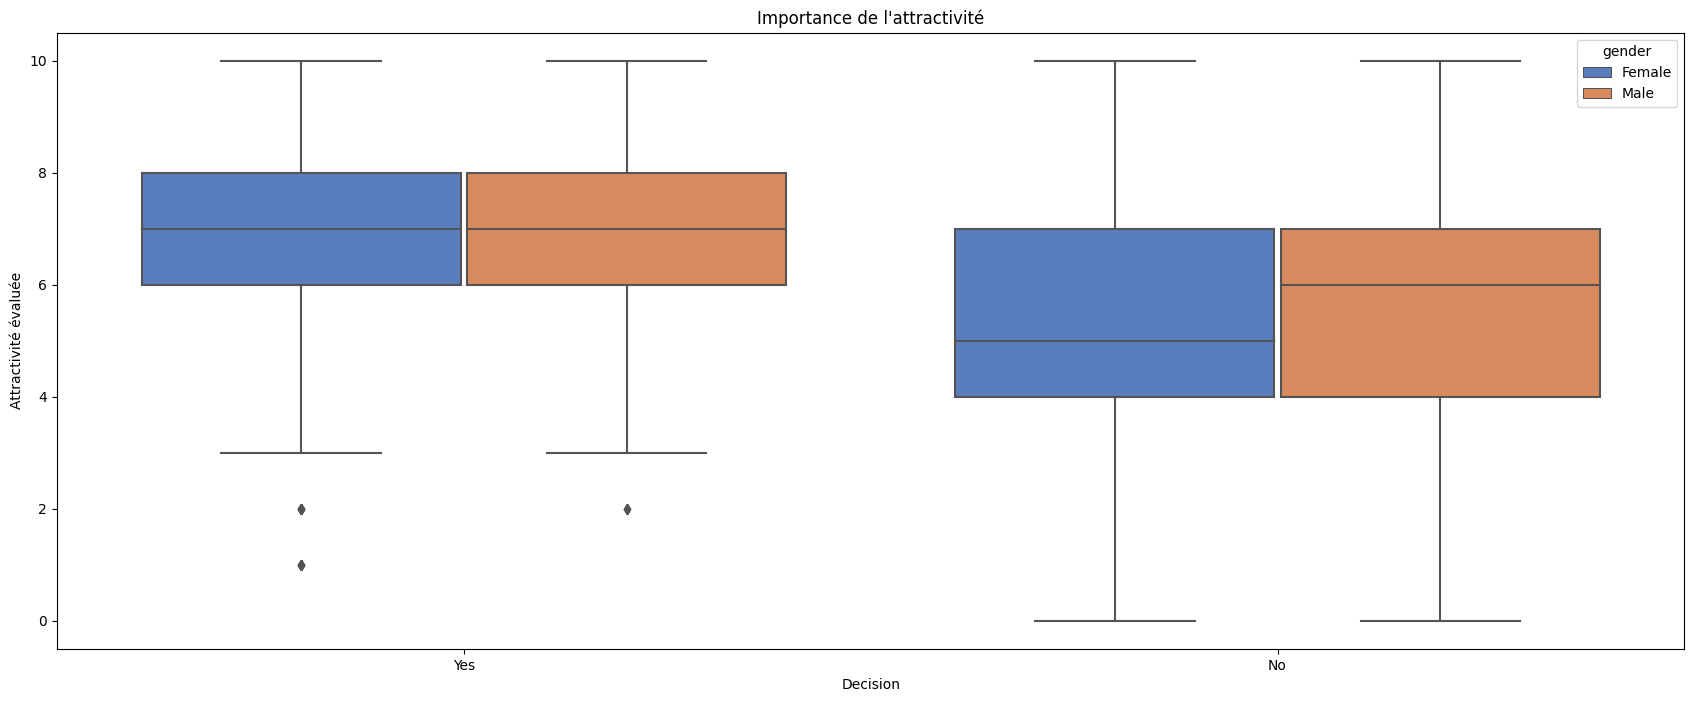

In [19]:
fig, axs = plt.subplots(figsize=(21,8))

# looking at acceptance/rejection by attractiveness attribute
sns.boxplot(x='dec', y='Attractive', data=df_clean, palette='muted',hue='gender',ax=axs
            ).set(title="Importance de l'attractivité", xlabel='Decision', ylabel='Attractivité évaluée')

plt.show()


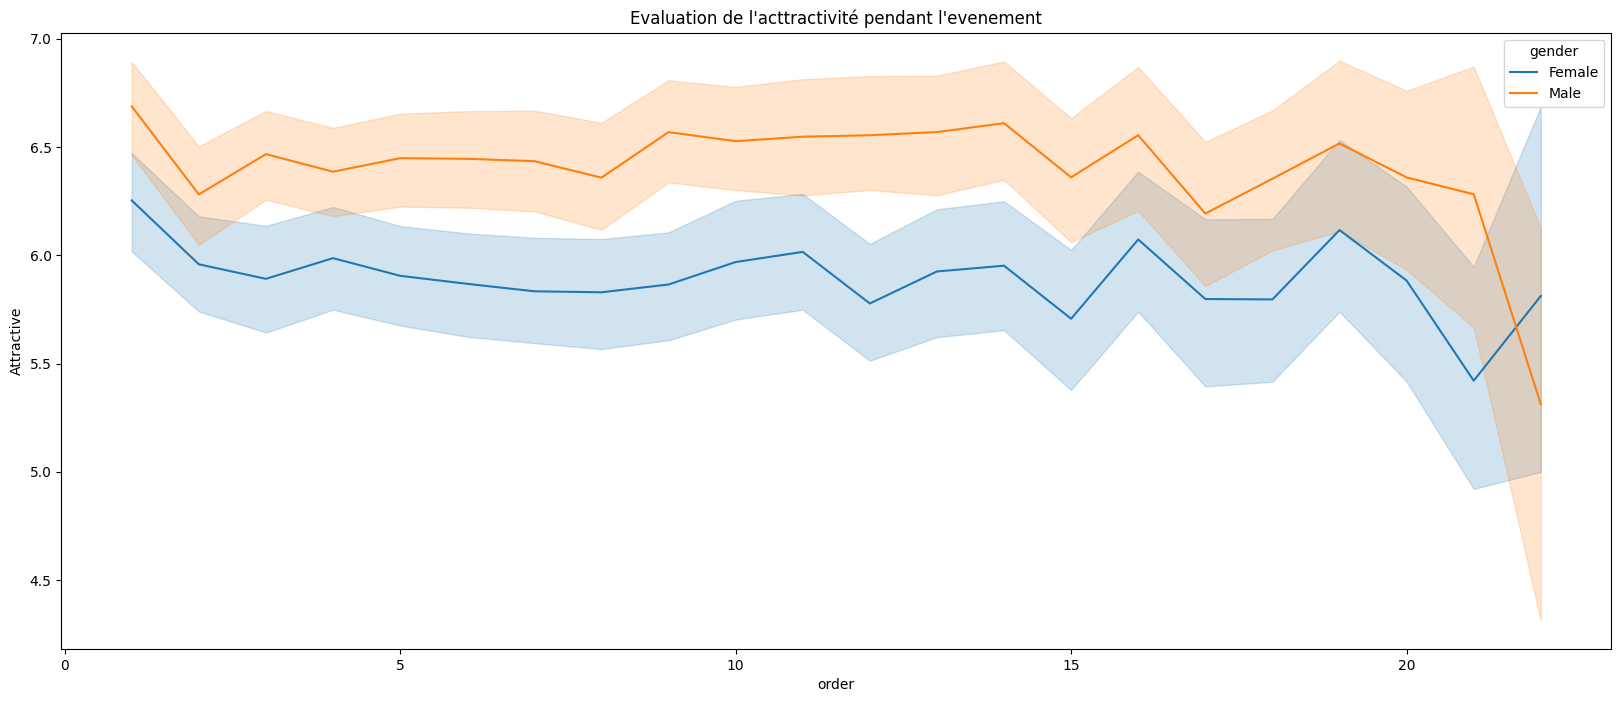

In [20]:
fig, axs = plt.subplots(figsize=(20,8))

sns.lineplot(x="order", y="Attractive", hue="gender", data=df_clean,ax=axs).set(title="Evaluation de l'acttractivité pendant l'evenement")

plt.show()

As can be seen from these graphs, attractiveness does have an impact on decision-making, for both men and women. In fact, women were more severe than men. The second graph also shows that as the evening progressed, the attractiveness scores dropped. Was this due to lassitude?

## Are shared interests more important than a shared racial background?

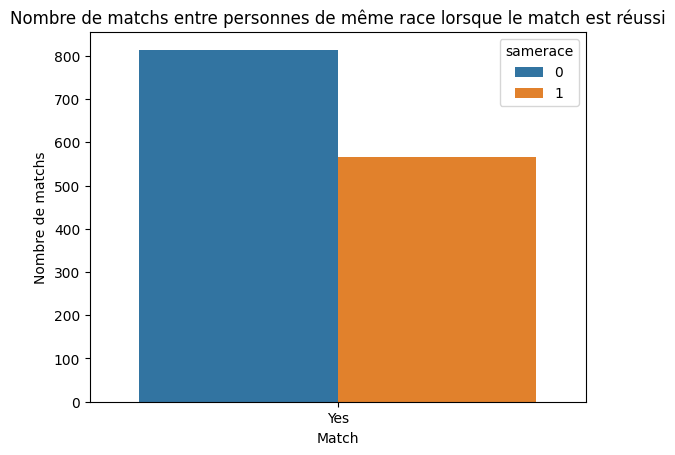

In [21]:
# df_clean['samerace']=df_clean['samerace'].apply(lambda x:"Yes" if x==1 else "No")

df_match_yes = df_clean[df_clean['match'] == 'Yes']

# Tracer le graphique
sns.countplot(x='match', hue='samerace',data=df_match_yes)
plt.title('Nombre de matchs entre personnes de même race lorsque le match est réussi')
plt.xlabel('Match')
plt.ylabel('Nombre de matchs')
plt.show()

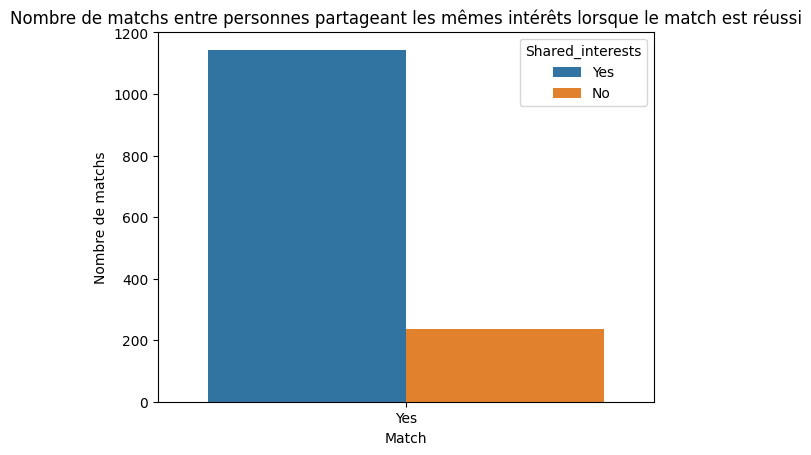

In [22]:
df_match_yes['Shared_interests']=df_match_yes['Shared_interests'].apply(lambda x:"Yes" if x>=5 else "No")


sns.countplot(x='match', hue='Shared_interests',data=df_match_yes)
plt.title('Nombre de matchs entre personnes partageant les mêmes intérêts lorsque le match est réussi')
plt.xlabel('Match')
plt.ylabel('Nombre de matchs')
plt.show()


Text(0.5, 1.0, 'Nombre de match par ethnie')

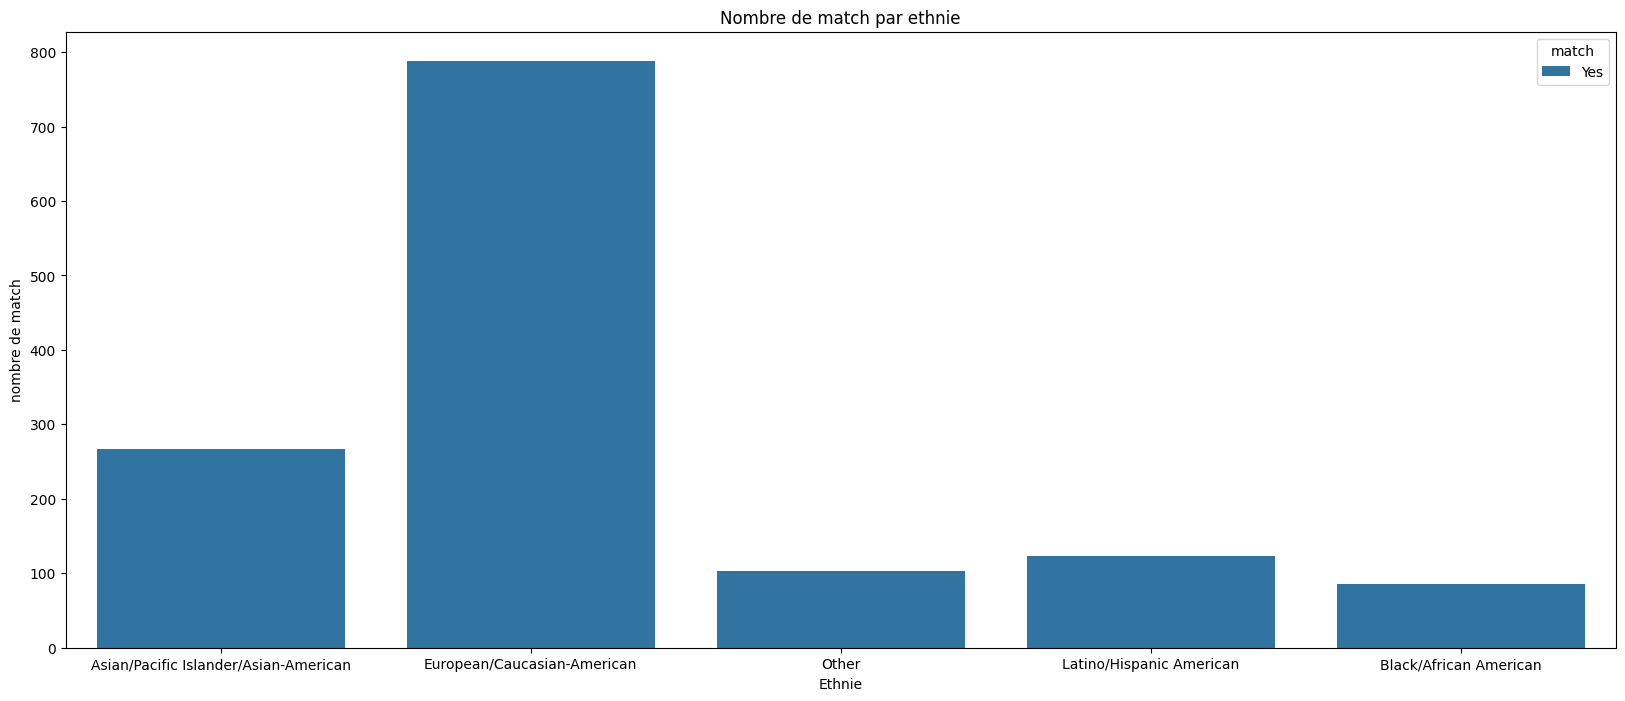

In [23]:
fig, axs = plt.subplots(figsize=(20,8))

sns.countplot(x="race",hue="match", data=df_match_yes, ax=axs)
plt.xlabel('Ethnie')
plt.ylabel('nombre de match')
plt.title('Nombre de match par ethnie')

In [24]:
print(df_match_yes.shape)
print(df['match'].value_counts())

(1380, 195)
match
0    6998
1    1380
Name: count, dtype: int64


According to our graphs and stats, we had 1,380 successful matches, and we can see that out of 1,380 matches, more than 1,100 were validated using the criterion of favourable shared interests, yet out of the same 1,380 matches, not even 600 matches using the criterion of belonging to the same race were validated. We can therefore conclude that shared interests are much more important than belonging to the same race

## Can people accurately predict their own perceived value in the dating market?

In [25]:
df_clean.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_Fun,pf_o_Ambitious,pf_o_sha,dec_o,Attractive_o,Sincere_o,Intelligent_o,Fun_o,Ambitious_o,Shared_interests_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,Attractive1_1,Sincere1_1,Intelligent1_1,Fun1_1,Ambitious1_1,Shared_interests1_1,Attractive4_1,Sincere4_1,Intelligent4_1,Fun4_1,Ambitious4_1,Shared_interests4_1,Attractive2_1,Sincere2_1,Intelligent2_1,Fun2_1,Ambitious2_1,Shared_interests2_1,Attractive3_1,Sincere3_1,Fun3_1,Intelligent3_1,Ambitious3_1,Attractive5_1,Sincere5_1,Intelligent5_1,Fun5_1,Ambitious5_1,dec,Attractive,Sincere,Intelligent,Fun,Ambitious,Shared_interests,like,prob,met,match_es,Attractive1_s,Sincere1_s,Intelligent1_s,Fun1_s,Ambitious1_s,Shared_interests1_s,Attractive3_s,Sincere3_s,Intelligent3_s,Fun3_s,Ambitious3_s,satis_2,length,numdat_2,Attractive7_2,Sincere7_2,Intelligent7_2,Fun7_2,Ambitious7_2,Shared_interests7_2,Attractive1_2,Sincere1_2,Intelligent1_2,Fun1_2,Ambitious1_2,Shared_interests1_2,Attractive4_2,Sincere4_2,Intelligent4_2,Fun4_2,Ambitious4_2,Shared_interests4_2,Attractive2_2,Sincere2_2,Intelligent2_2,Fun2_2,Ambitious2_2,Shared_interests2_2,Attractive3_2,Sincere3_2,Intelligent3_2,Fun3_2,Ambitious3_2,Attractive5_2,Sincere5_2,Intelligent5_2,Fun5_2,Ambitious5_2,you_call,them_cal,date_3,numdat_3,num_in_3,Attractive1_3,Sincere1_3,Intelligent1_3,Fun1_3,Ambitious1_3,Shared_interests1_3,Attractive7_3,Sincere7_3,Intelligent7_3,Fun7_3,Ambitious7_3,Shared_interests7_3,Attractive4_3,Sincere4_3,Intelligent4_3,Fun4_3,Ambitious4_3,Shared_interests4_3,Attractive2_3,Sincere2_3,Intelligent2_3,Fun2_3,Ambitious2_3,Shared_interests2_3,Attractive3_3,Sincere3_3,Intelligent3_3,Fun3_3,Ambitious3_3,Attractive5_3,Sincere5_3,Intelligent5_3,Fun5_3,Ambitious5_3
0,1,1.0,Female,1,1,1,10,7,NaN,4,1,11.0,No,0.14,0,27.0,European/Caucasian-American,35.0,20.0,20.0,20.0,0.0,5.0,No,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,Yes,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,Female,1,1,1,10,7,NaN,3,2,12.0,No,0.54,0,22.0,European/Caucasian-American,60.0,0.0,0.0,40.0,0.0,0.0,No,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,Asian/Pacific Islander/Asian-American,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,Yes,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,Female,1,1,1,10,7,NaN,10,3,13.0,Yes,0.16,1,22.0,Asian/Pacific Islander/Asian-American,19.0,18.0,19.0,18.0,14.0,12.0,Yes,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.

In [26]:
def catego_prob(score:float):
    if score < 1.0:
        return "No chance"
    elif score >= 1.0 and score < 4.0:
        return "I'm 25% sure"
    elif score >= 4.0 and score < 7.0:
        return "I'm 50% sure"
    elif score >= 7.0 and score < 10.0:
        return "I'm 75% sure"
    if score == 10.0:
        return "I'm 100% sure"
    


In [27]:
# Let's  remove all missing values inside prob and prob_o features 
df_clean['prob'].dropna(inplace=True)
df_clean['prob_o'].dropna(inplace=True)

# Let's rename values inside prob and prob_o features 
df_clean['prob'] = df_clean['prob'].apply(catego_prob)
df_clean['prob_o'] = df_clean['prob_o'].apply(catego_prob)

In [28]:
df_clean['prob'].value_counts()

prob
I'm 50% sure     4137
I'm 75% sure     2031
I'm 25% sure     1664
I'm 100% sure     188
No chance          49
Name: count, dtype: int64

Text(0.5, 1.0, "Among people with a match, what is the probability that people think their partner will say 'yes' for them ?")

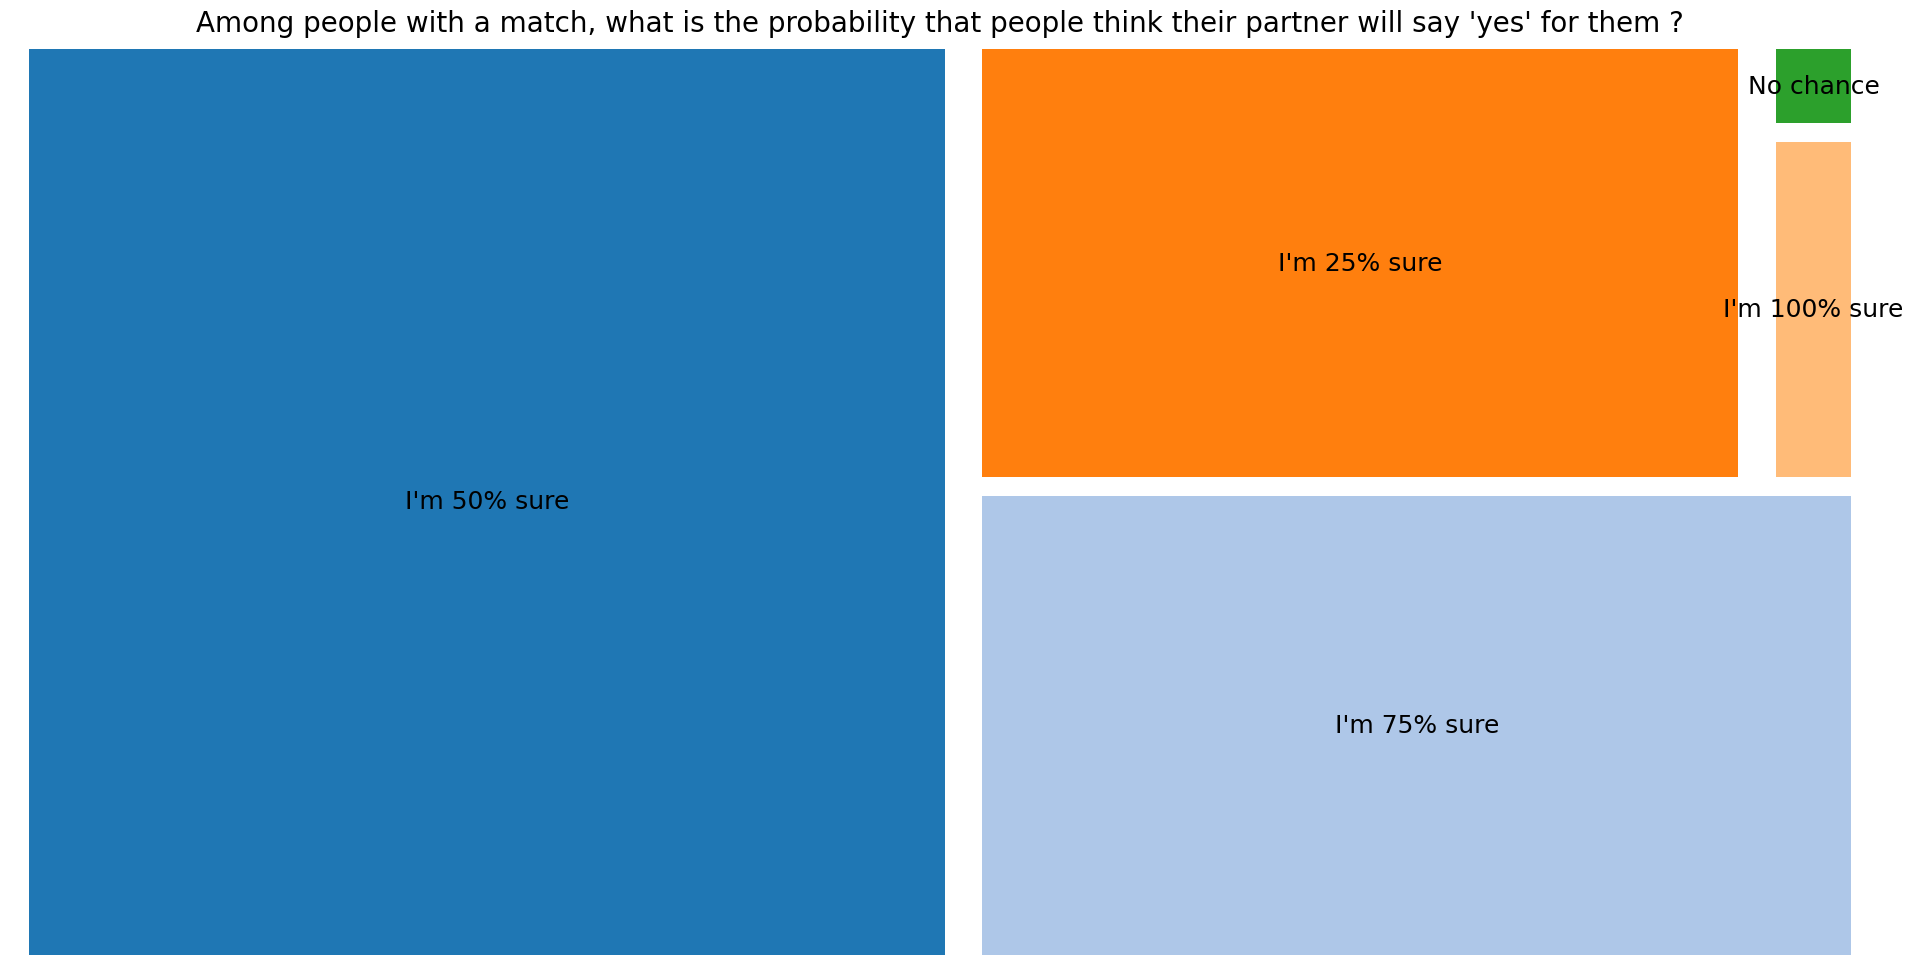

In [29]:
# create a plot figure with figsize
plt.figure(figsize=(24, 12))
# we don't require the axis values so lets remove it
plt.axis("off")
axis = squarify.plot(df_clean["prob"].value_counts(),
                     label=df_clean["prob"].value_counts().index,
                     color=sns.color_palette("tab20", len(
                                            df_clean["prob"].value_counts())),
                     pad=0.5,
                     text_kwargs={'fontsize': 18})
axis.set_title(
    "Among people with a match, what is the probability that people think their partner will say 'yes' for them ?", fontsize=20)


# goals = [FUN, MEET_PEOPLE, DATE, SERIOUS, TRY, OTHER]
# goals_chart_title = "Why people participates to this SpeedDating experimentation ?"
# max_value = df_goals.max().max()
# fig = plt.figure(figsize=(15, 5))
# ax3 = generate_spider_chart(df_goals, goals, count=1,
#                             title=goals_chart_title, ticks=[0,500,1000,1500, max_value])

In [30]:
df_match_yes['prob'] = df_match_yes['prob'].apply(catego_prob)
df_match_yes['prob_o'] = df_match_yes['prob_o'].apply(catego_prob)



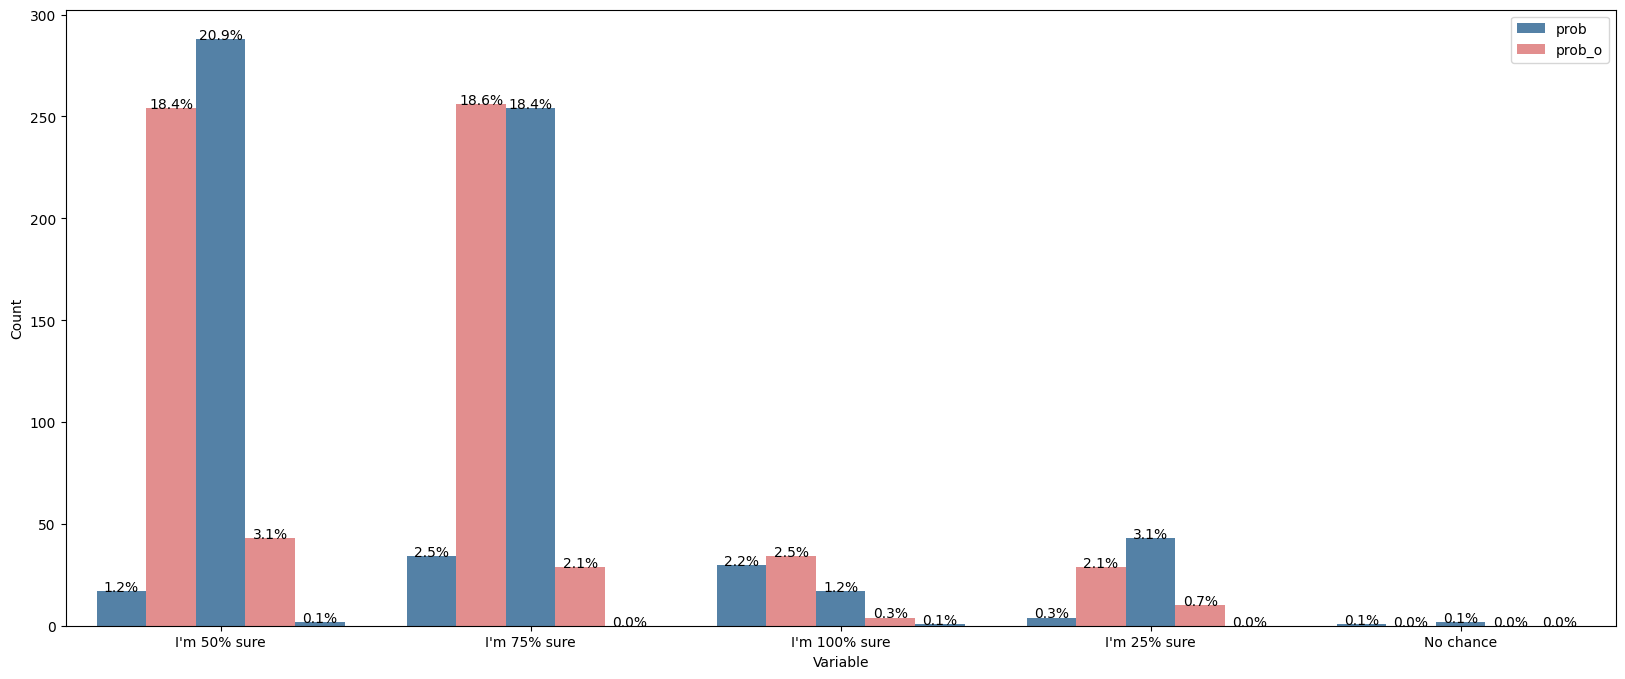

In [34]:
# ax = sns.countplot(data=df_match_yes, x="prob", hue="prob_o", ax=axs)



# sns.countplot(x="race",hue="match", data=df_match_yes, ax=axs)
# plt.xlabel('Ethnie')
# plt.ylabel('nombre de match')
# plt.title('Nombre de match par ethnie')




fig, axs = plt.subplots(figsize=(20, 8))

# Créer une palette de couleurs pour les barres
colors = ["steelblue", "lightcoral"]

# Utiliser la fonction countplot pour tracer le graphique
sns.countplot(data=df_match_yes, x="prob", hue="prob_o", palette=colors, ax=axs)

# Calculer les pourcentages pour chaque catégorie
total = len(df_match_yes)
for p in axs.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axs.annotate(percentage, (x, y), ha='center')

# Ajouter des étiquettes sur l'axe x
axs.set_xlabel("Variable")
axs.set_ylabel("Count")

# Afficher la légende
axs.legend(["prob", "prob_o"])

# Afficher le graphique
plt.show()


<Axes: xlabel='prob_o', ylabel='count'>

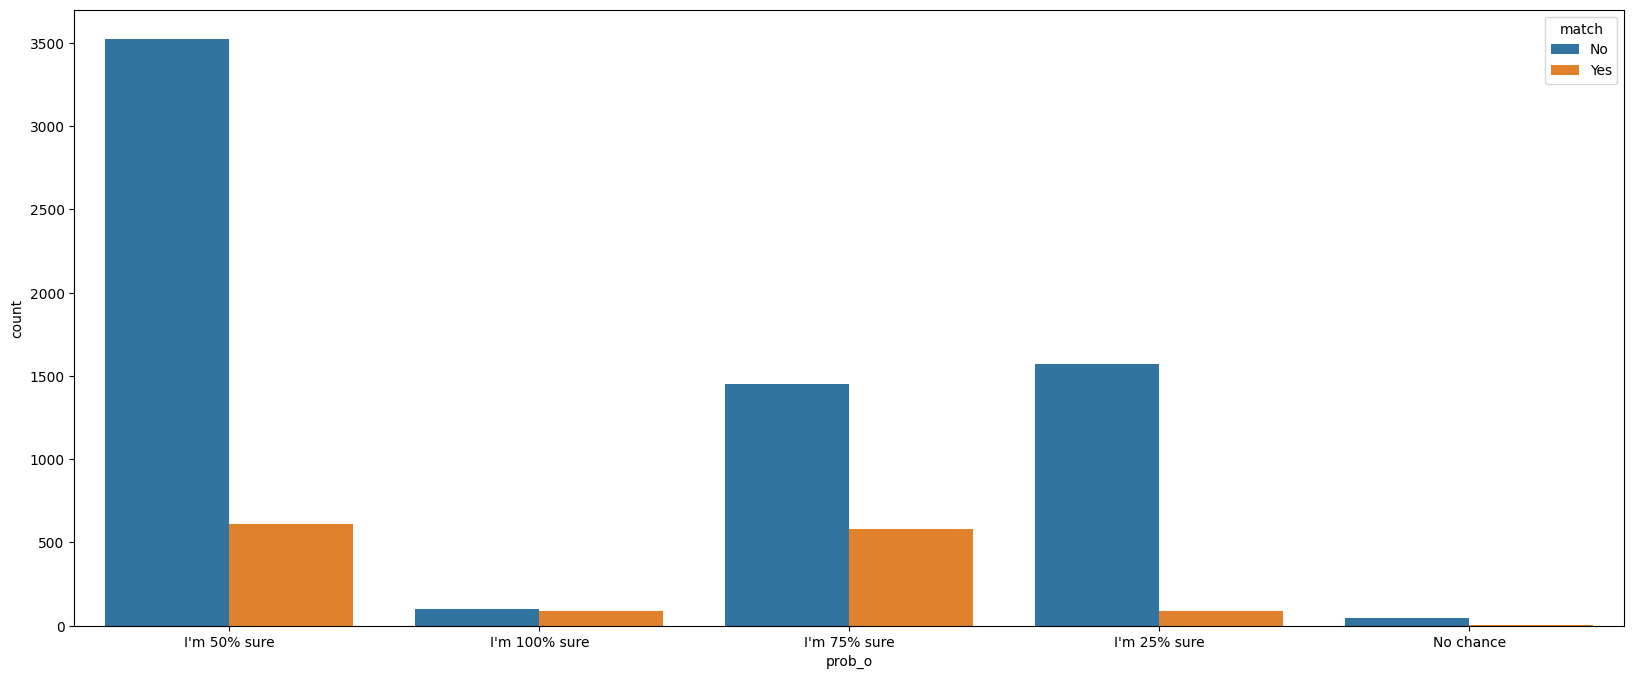

In [32]:
fig, axs = plt.subplots(figsize=(20,8))


sns.countplot(data = df_clean, x = "prob_o", hue = "match", ax=axs)


# sns.countplot(x="race",hue="match", data=df_match_yes, ax=axs)
# plt.xlabel('Ethnie')
# plt.ylabel('nombre de match')
# plt.title('Nombre de match par ethnie')